## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
df.head(4)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1


In [2]:
# Checking the number of mice.
print(df['Mouse ID'].count())

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
DUPLICATE_DATA = df[df.duplicated(subset = ['Mouse ID','Timepoint'])]
#DUPLICATE_DATA = df[df['Timepoint'].duplicated()]
DUPLICATE_DATA
# Not sure the above code is working properly...

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
DUP_MOUSE_ID = df[df.duplicated(['Mouse ID'])]
DUP_MOUSE_ID.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
CLEAN_DATA = df.copy()
Dups_dropped = CLEAN_DATA.drop_duplicates(subset=['Mouse ID'], keep='last')
Dups_dropped

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
len(Dups_dropped)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of , and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

MEAN = Dups_dropped.mean()
MEDIAN = Dups_dropped.median()
VARIANCE = Dups_dropped.var()
STANDARD_DEVIATION = Dups_dropped.std()
SEM = Dups_dropped.sem()

SUMMARY_STATS =  ({
                    'mean': [MEAN], 
                    'median': [MEDIAN],
                    'variance': [VARIANCE],
                    'standard deviation': [STANDARD_DEVIATION],
                    'SEM': [SEM]
                  })
SUMMARY_STATS 

{'mean': [Age_months            12.730924
  Weight (g)            26.116466
  Timepoint             32.911647
  Tumor Volume (mm3)    54.999137
  Metastatic Sites       1.682731
  dtype: float64],
 'median': [Age_months            13.00000
  Weight (g)            27.00000
  Timepoint             45.00000
  Tumor Volume (mm3)    55.84141
  Metastatic Sites       1.00000
  dtype: float64],
 'variance': [Age_months             52.253919
  Weight (g)             13.667833
  Timepoint             239.169582
  Tumor Volume (mm3)    160.151054
  Metastatic Sites        1.757805
  dtype: float64],
 'standard deviation': [Age_months             7.228687
  Weight (g)             3.697003
  Timepoint             15.465109
  Tumor Volume (mm3)    12.655080
  Metastatic Sites       1.325823
  dtype: float64],
 'SEM': [Age_months            0.458099
  Weight (g)            0.234288
  Timepoint             0.980061
  Tumor Volume (mm3)    0.801983
  Metastatic Sites      0.084021
  dtype: float64]}

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

stats_table = Dups_dropped.agg(['mean','median','var','std','sem'])
stats_table

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
mean,12.730924,26.116466,32.911647,54.999137,1.682731
median,13.000000,27.000000,45.000000,55.841410,1.000000
var,52.253919,13.667833,239.169582,160.151054,1.757805
std,7.228687,3.697003,15.465109,12.655080,1.325823
sem,0.458099,0.234288,0.980061,0.801983,0.084021


## Bar and Pie Charts

In [9]:
Dups_dropped['Drug Regimen'].value_counts()

Placebo      25
Ceftamin     25
Ramicane     25
Propriva     25
Ketapril     25
Naftisol     25
Capomulin    25
Zoniferol    25
Infubinol    25
Stelasyn     24
Name: Drug Regimen, dtype: int64

([<matplotlib.axis.XTick at 0x7fd7b89f2ca0>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Propriva'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Ketapril'),
  Text(5, 0, 'Infubinol'),
  Text(6, 0, 'Ceftamin'),
  Text(7, 0, 'Placebo'),
  Text(8, 0, 'Zoniferol'),
  Text(9, 0, 'Stelasyn')])

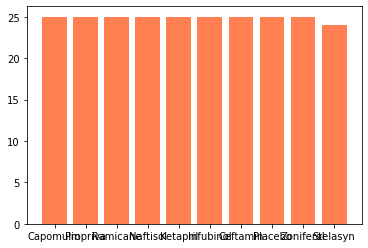

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
gender = [25, 25, 25 , 25, 25, 25, 25, 25, 25, 24]
x_axis = np.arange(len(gender))

plt.bar(x_axis, gender, color='coral', align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Propriva", "Ramicane", "Naftisol", "Ketapril", "Infubinol", "Ceftamin", "Placebo", "Zoniferol", "Stelasyn"])

([<matplotlib.axis.XTick at 0x7fd7b8d12b50>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Propriva'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Ketapril'),
  Text(5, 0, 'Infubinol'),
  Text(6, 0, 'Ceftamin'),
  Text(7, 0, 'Placebo'),
  Text(8, 0, 'Zoniferol'),
  Text(9, 0, 'Stelasyn')])

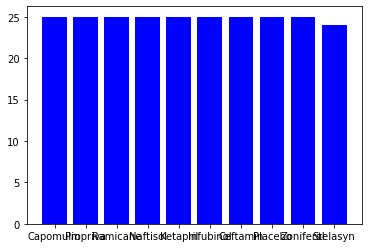

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen = ["Capomulin", "Propriva", "Ramicane", "Naftisol", "Ketapril", "Infubinol", "Ceftamin", "Placebo", "Zoniferol", "Stelasyn"]
counts = [25, 25, 25 , 25, 25, 25, 25, 25, 25, 24]
x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, color="b", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen)

([<matplotlib.patches.Wedge at 0x7fd7b8d6e6a0>,
 [Text(-0.7655308193487089, -0.9241009493704108, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.44655964462008013, -0.5390588871327395, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

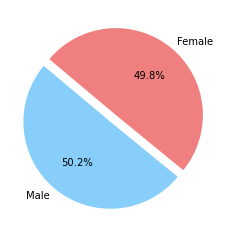

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ['Male', 'Female']
values = [125, 124]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)

plt.pie(values, explode = explode, labels = labels, colors =colors,
        autopct="%1.1f%%", startangle=140)

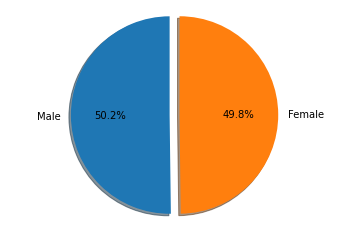

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Labels = ['Male', 'Female']
Size = [125 , 124]
Explode = [0.1, 0]

fig1, ax1 = plt.subplots()
ax1.pie(Size, explode = Explode, labels = Labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
Dups_dropped.head(4)
Greates_timepoint = Dups_dropped[['Mouse ID','Drug Regimen','Timepoint']]
#group study data them merger with clean (group by regimen then find highest timepoint then meger with clean data)
Greates_timepoint.groupby('Drug Regimen').max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(Dups_dropped, Greates_timepoint, on="Timepoint")
final_df = merge_df.drop_duplicates(subset=['Mouse ID_x'])

In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_df['Drug Regimen_x'].unique()
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
for tv in treatments:
    dtv = final_df.loc[final_df['Drug Regimen_x'] == tv]['Tumor Volume (mm3)']
    x = dtv.quantile([.25, .5, .75])
    tumor_vol.append(dtv)
    inter_q = x[.75] - x[.25]
    lower_bound = x[.25] - (1.5 * inter_q)
    upper_bound = x[.75] + (1.5 * inter_q)
    print (dtv.loc[dtv < lower_bound])
    print('-----------')
    print (dtv.loc[dtv > upper_bound])
# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------
Series([], Name: Tumor Volume (mm3), dtype: float64)
17725    36.321346
Name: Tumor Volume (mm3), dtype: float64
-----------
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd7b9da2580>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd7b9da2c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd7b9da2220>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd7b9dab340>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd7b9dab6a0>,
 'means': []}

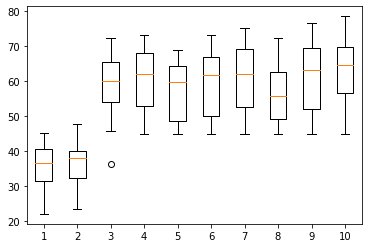

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol)

## Line and Scatter Plots

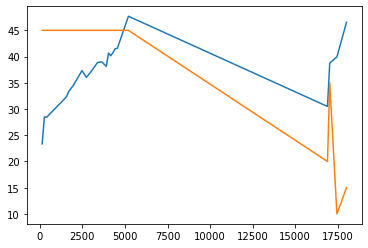

In [71]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_volume_only = final_df.loc[final_df["Drug Regimen_x"] == "Capomulin", :]

tvo = tumor_volume_only['Tumor Volume (mm3)']
tpo =  tumor_volume_only['Timepoint']

plt.plot(tvo)
plt.plot(tpo)
plt.show()

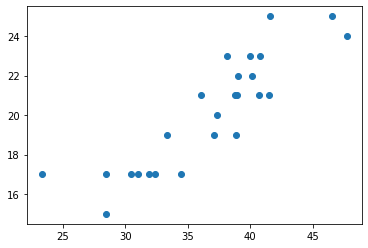

In [77]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
atv = tumor_volume_only['Tumor Volume (mm3)']
mw = tumor_volume_only['Weight (g)']

plt.scatter(atv, mw)

## Correlation and Regression

In [80]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
